### <b>reproduce FLH retrieval for OCI</b>

In [1]:
import numpy as np
import xarray as xr
import dask.array as da
from dask.distributed import Client

import earthaccess
from functools import partial
import statsmodels.api as sm

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
auth = earthaccess.login()

In [ ]:
# select a granule for testing
# Granule = "20250429T171930"
num_of_chunks = 10
granule = earthaccess.open(
    granules = ["https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240718T161154.L1B.V3.nc"]
)
# name1 = "/home/zhe2/data/PACE/L1B_V3/PACE_OCI.20250130T202559.L1B.V3.nc"
datatree1 = xr.open_datatree(granule[0], chunks={'scanse': num_of_chunks})
ds1 = xr.merge(datatree1.to_dict().values())
# L2 data
granule = earthaccess.open(
    granules = ["https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240718T161154.L2.OC_AOP.V3_0.nc"]
)
# name2 = "/home/zhe2/data/PACE/L2_AOP/PACE_OCI.20250130T202559.L2.OC_AOP.V3_0.nc"
datatree2 = xr.open_datatree(granule[0], chunks={'number_of_lines': num_of_chunks})
ds2 = xr.merge(datatree2.to_dict().values())
ds2

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_728035/2726436670.py:15: UserWarning: The specified chunks separate the stored chunks along dimension "number_of_lines" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  datatree2 = xr.open_datatree(granule[0], chunks={'number_of_lines': num_of_chunks})


<xarray.Dataset> Size: 3GB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 172, number_of_lines: 1710,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 1kB 346.0 348.0 351.0 ... 717.0 719.0
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/32)
    wavelength     (number_of_bands) float64 2kB dask.array<chunksize=(32,), meta=np.ndarray>
    vcal_gain      (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    vcal_offset    (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    F0             (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    aw             (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    bbw            (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    ...             ...
    avw            (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    nflh           (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    longitude      (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    latitude       (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    tilt           (number_of_lines) float32 7kB dask.array<chunksize=(10,), meta=np.ndarray>
Attributes: (12/45)
    title:                             OCI Level-2 Data AOP
    product_name:                      PACE_OCI.20250430T175451.L2.OC_AOP.V3_...
    processing_version:                3.0
    history:                           l2gen par=/data8/sdpsoper/vdc/vpu27/wo...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_max:                -63.351
    geospatial_lon_min:                -96.2965
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9852890968322754

In [ ]:
# subset ds2 to align with wavelength_3d
wvlen = ds2.wavelength.values
index = np.argwhere()

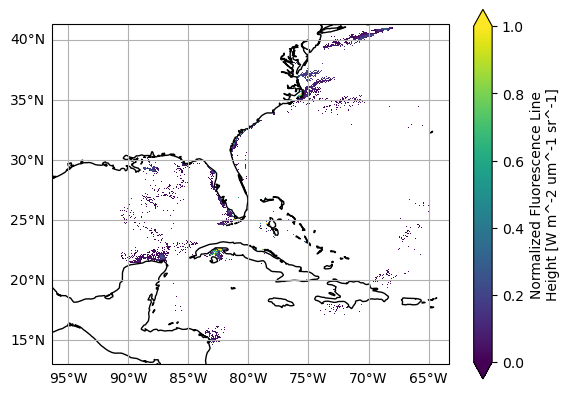

In [ ]:
ds2 = ds2.set_coords(("longitude", "latitude"))
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = ds["nflh"].plot(
    x="longitude", y="latitude", cmap="viridis", vmin=0, vmax=1., ax=ax
)

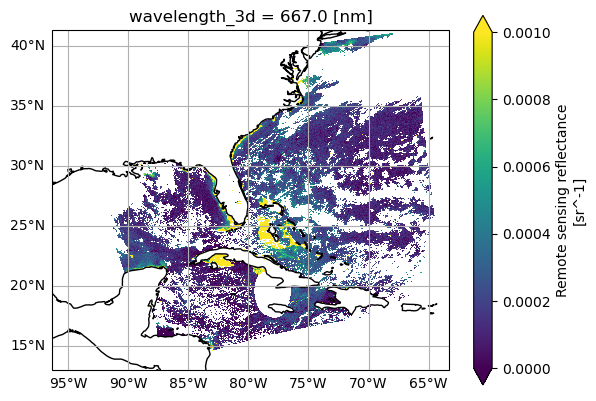

In [ ]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = ds["Rrs"].sel(wavelength_3d=667, method="nearest").plot(
    x="longitude", y="latitude", cmap="viridis", vmin=0, vmax=.001, ax=ax
)

In [6]:
ds1

<xarray.Dataset> Size: 5GB
Dimensions:                (blue_bands: 119, red_bands: 163, SWIR_bands: 9,
                            HAM_sides: 2, polarization_coefficients: 3,
                            scans: 1710, pixels: 1272, quaternion_elements: 4,
                            vector_elements: 3)
Coordinates:
    latitude               (scans, pixels) float32 9MB ...
    longitude              (scans, pixels) float32 9MB ...
Dimensions without coordinates: blue_bands, red_bands, SWIR_bands, HAM_sides,
                                polarization_coefficients, scans, pixels,
                                quaternion_elements, vector_elements
Data variables: (12/37)
    blue_wavelength        (blue_bands) float32 476B ...
    blue_solar_irradiance  (blue_bands) float32 476B ...
    red_wavelength         (red_bands) float32 652B ...
    red_solar_irradiance   (red_bands) float32 652B ...
    SWIR_wavelength        (SWIR_bands) float32 36B ...
    SWIR_bandpass          (SWIR_bands) float32 36B ...
    ...                     ...
    rhot_blue              (blue_bands, scans, pixels) float32 1GB ...
    rhot_red               (red_bands, scans, pixels) float32 1GB ...
    rhot_SWIR              (SWIR_bands, scans, pixels) float32 78MB ...
    qual_blue              (blue_bands, scans, pixels) float32 1GB ...
    qual_red               (red_bands, scans, pixels) float32 1GB ...
    qual_SWIR              (SWIR_bands, scans, pixels) float32 78MB ...
Attributes: (12/36)
    title:                             PACE OCI Level-1B Data
    instrument:                        OCI
    platform:                          PACE
    processing_level:                  L1B
    cdm_data_type:                     swath
    geospatial_lat_units:              degrees_north
    ...                                ...
    time_coverage_start:               2025-04-29T17:19:30.071Z
    time_coverage_end:                 2025-04-29T17:24:29.953Z
    processing_version:                3.0.1
    identifier_product_doi_authority:  https://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L1B/SCI/3
    history:                           2025-08-07T02:30:12Z: l1bgen_oci ephfi...

In [36]:
ds2

<xarray.Dataset> Size: 5GB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 172, number_of_lines: 1710,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 1kB 346.0 348.0 351.0 ... 717.0 719.0
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/33)
    wavelength     (number_of_bands) float64 2kB dask.array<chunksize=(32,), meta=np.ndarray>
    vcal_gain      (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    vcal_offset    (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    F0             (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    aw             (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    bbw            (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    ...             ...
    nflh           (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    longitude      (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    latitude       (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(10, 1272), meta=np.ndarray>
    tilt           (number_of_lines) float32 7kB dask.array<chunksize=(10,), meta=np.ndarray>
    Lw             (number_of_lines, pixels_per_line, wavelength_3d) float32 1GB dask.array<chunksize=(10, 256, 31), meta=np.ndarray>
Attributes: (12/45)
    title:                             OCI Level-2 Data AOP
    product_name:                      PACE_OCI.20250430T175451.L2.OC_AOP.V3_...
    processing_version:                3.0
    history:                           l2gen par=/data8/sdpsoper/vdc/vpu27/wo...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_max:                -63.351
    geospatial_lon_min:                -96.2965
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9852890968322754

#### <b>Water leaving radiance (W/m2/µm/sr)</b>

ref: https://www.earthdata.nasa.gov/apt/documents/rrs/v1.1#output_variables
$$L_{WN}=R_{rs}\times F_0 \times f_s$$

In [4]:
wavelength3d = ds2.wavelength_3d
reflective_bands = ds2.wavelength
boolean_mask = np.isin(reflective_bands, wavelength3d)
boolean_mask

F0  = ds2.F0[boolean_mask]
Rrs = ds2.Rrs
sza = ds1.solar_zenith
earth_sun_distance_correction = ds1.attrs["earth_sun_distance_correction"] # f_s

(1250.0, 1750.0)

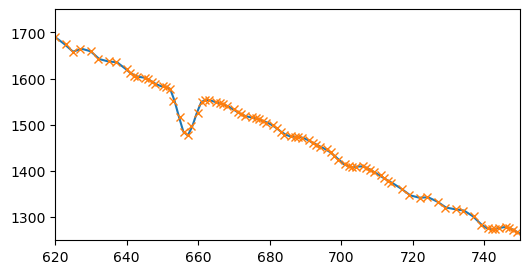

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(ds1.red_wavelength, ds1.red_solar_irradiance)
plt.plot(ds2.wavelength, ds2.F0, "x")
plt.xlim(620, 750)
plt.ylim(1250, 1750)

In [5]:
cosSZA  = np.cos(np.deg2rad(sza))
nLw     = Rrs * F0.rename({'number_of_reflective_bands': 'wavelength_3d'})
Lw      = Rrs * F0.rename({'number_of_reflective_bands': 'wavelength_3d'}) * cosSZA.rename({'scans': 'number_of_lines', 'pixels': 'pixels_per_line'})

In [ ]:
# assign new var
ds2["Lw"] = xr.DataArray(
    nLw,    # ❗️
    dims=['number_of_lines', 'pixels_per_line', 'wavelength_3d'],
    attr
)


KeyboardInterrupt: 

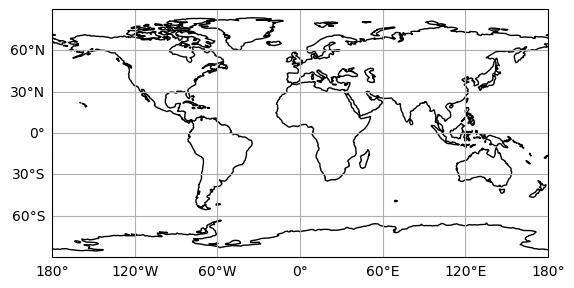

In [45]:
# plot water leaving radiance
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = ds2["Lw"].sel(wavelength_3d=slice(620, 750)).mean().plot(
    x="longitude", y="latitude", cmap="viridis", vmin=0, vmax=1, ax=ax
)

In [13]:
np.argwhere((ds2.nflh.values>=.4) & (ds2.nflh.values<=.5))

array([[  12,  119],
       [  13,  119],
       [  15,  119],
       ...,
       [1512, 1027],
       [1513, 1026],
       [1516, 1026]], shape=(677, 2))

Text(0.5, 1.0, 'select: number_of_lines=1512, px_per_line=1027')

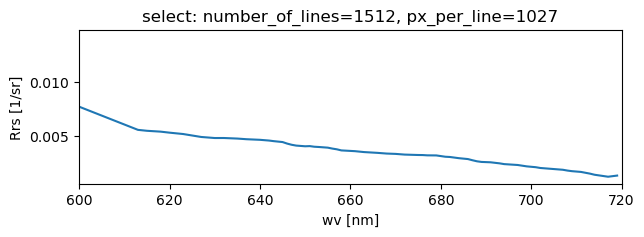

In [14]:
# vis.
lines = 1512
px    = 1027
Rrs_sp = ds2.Rrs.isel(number_of_lines=lines, pixels_per_line=px)
fig, ax = plt.subplots(figsize=(7,2))
ax.plot(wavelength3d, Rrs_sp)
ax.set_xlim(600, 720)
ax.set_xlabel("wv [nm]")
ax.set_ylabel("Rrs [1/sr]")
ax.set_title(f"select: number_of_lines={lines}, px_per_line={px}")

Text(0.5, 1.0, 'select: number_of_lines=1512, px_per_line=1027')

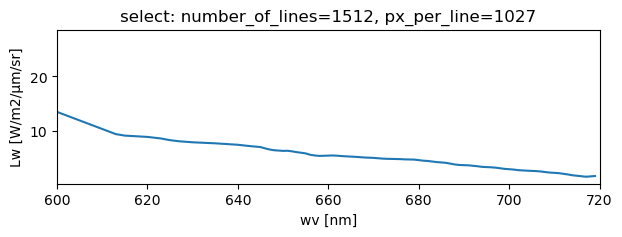

In [15]:
# vis.
Lw_sp  = ds2.Lw.isel(number_of_lines=lines, pixels_per_line=px)
fig, ax = plt.subplots(figsize=(7,2))
ax.plot(wavelength3d, Lw_sp)
ax.set_xlim(600, 720)
ax.set_xlabel("wv [nm]")
ax.set_ylabel("Lw [W/m2/µm/sr]")
ax.set_title(f"select: number_of_lines={lines}, px_per_line={px}")

#### <b>Fit baseline</b>

In [16]:
def find_nearest(arr, trg):
    idx = [np.argmin(np.abs(arr - i)) for i in trg]
    return idx

def linear_fit(wavlen, ydata):
    # add constants & fit
    X = sm.add_constant(wavlen)
    mod = sm.OLS(ydata, X)
    res = mod.fit()
    # get fitting results
    c0, c1 = res.params
    cov00, cov01, _, cov11 = res.cov_params().flatten()
    return c0, c1, cov00, cov01, cov11

In [ ]:
# baseline wavelengths
base_wv = np.array([649.599976, 650.900024, 652.099976, 653.299988,
                    654.599976, 655.799988, 657.099976, 658.299988,
                    659.599976, 710.500000, 711.799988, 713.000000,
                    714.299988, 716.799988, 719.200012])
fluo_wv = 678.20001
# mask_bl = find_nearest(wavelength3d.values, base_wv)
mask_bl = find_nearest(ds1.red_wavelength.values, base_wv)

# c0, c1, _, _, _ = linear_fit(wavelength3d[mask_bl].values, Lw_sp[mask_bl].values)
c0, c1, _, _, _ = linear_fit(ds1.red_wavelength[mask_bl].values, Lw_sp[mask_bl].values)
# retrieve baseline
bl_sp = c0 + c1 * wavelength3d
# flh
# mask_fl = find_nearest(wavelength3d.values, [fluo_wv])
mask_fl = find_nearest(wavelength3d.values, [fluo_wv])
flh_sp  = Lw_sp[mask_fl] - bl_sp[mask_fl]
print(f"retrieved fluorescence line height = {flh_sp.values} W/m2/µm/sr")
# ref L2_AOP
print(f"product fluorescence line height = {ds2.nflh.isel(number_of_lines=lines, pixels_per_line=px).values} W/m2/µm/sr")

retrieved fluorescence line height = [-14.89705534] W/m2/µm/sr
product fluorescence line height = 0.43797004222869873 W/m2/µm/sr


In [35]:
ds1.red_wavelength[mask_bl].values

array([649.64685, 650.8862 , 652.125  , 653.3656 , 654.602  , 655.83875,
       657.0799 , 658.3245 , 659.56464, 710.5569 , 711.80115, 713.0484 ,
       714.2976 , 716.7905 , 719.2804 ], dtype=float32)

In [21]:
ds2.nflh.isel(number_of_lines=lines, pixels_per_line=px).values / flh_sp.values

array([1.03446607])

In [18]:
flh_sp.values * earth_sun_distance_correction**2

array([0.43611473])

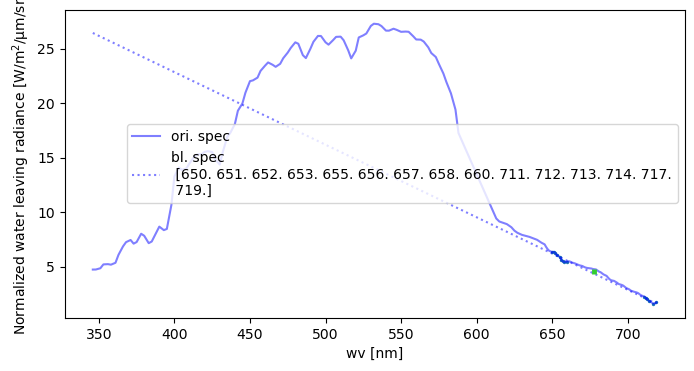

In [25]:
fig, ax = plt.subplots(figsize=(8,4), sharex=True)
ax.plot(wavelength3d, Lw_sp,            
        color='b', linestyle="-", alpha=.5,
        label=f"ori. spec")
ax.scatter(wavelength3d[mask_bl].values, Lw_sp[mask_bl].values, s=2)
ax.plot(wavelength3d, bl_sp,
            color='b', linestyle=":", alpha=.5,
            label=f"bl. spec\n {wavelength3d[mask_bl].values.round(2)}"
          )
ax.vlines(wavelength3d[mask_fl], bl_sp[mask_fl], Lw_sp[mask_fl],
          linewidth=3.5, color="limegreen",
        #   label=f"retrieved FLH = {flh_sp[0]: .5f}"
          )
ax.set_xlabel("wv [nm]")
ax.set_ylabel(f"Normalized water leaving radiance [W/m$^2$/µm/sr]")
ax.legend()
ax.set_xlim(640, 720)
# fig.suptitle(f"L2 product: flh={flh_sp: .3f}, chl={chl_sp: .3f}\n" + 
#           f"px={px}, scans={sc} of Granule # {Granule}"
#         )

#### <b>Apply to the scene</b>

In [ ]:
def nflh_oci():
    